# Couresework 23/24 for CHME0031

## Q1 – Fentanyl prescription January 2023:
Explore and validate the dataset;

Determine which practice prescribed the most fentanyl during January 2023 and check the validity of the column “TOTAL_QUANTITY”.

## A1:

To address the question, I delved into the epd_opioid_2023 dataset, discovering it comprises 950,994 rows and 15 columns. The `head` function allows me to view the details of the dataframe's first five rows and the `info` function helps me understand the type of variables.

I used `unique` function to check the columns `PRACTICE_NAME` and `PRACTICE_CODE`, and found out that there are some practices that share the same name. So I used `PRACTICE_CODE` to distinguish from each other.

According to the English Prescribing Dataset Release Guidance, `TOTAL_QUANTITY` is computed by multiplying the `QUANTITY` and `ITEMS` columns. The output of for loop doesn't print the miscalculation so its accuracy is confirmed. 

The Rydal practice recorded the highest fentanyl prescriptions at 1073 in January 2023 among the practices in London, surpassing the second-ranking Beechwood Medical Centre by 63 prescriptions.The C&H CCG Home Visiting Service OOH had the lowest prescription count, with only 2 in January 2023.

The fentanyl prescription amounts exhibit huge variability, with a standard deviation of approximately 93. The average prescription amount is 56, and the median stands at 30.

From the merged table, we can see that although the Rydal practice prescribed the most fentanyl, the number of regisrtation is not the most. To reduce the prescription, the GP should communicate and collaborate with each other.

The further study can focus on generating the heatmap to visualize the difference in total quantity of fentanyl prescription of regions and find the geographic characteristics.

In [1]:
# load the module pandas to read, clean and analyze the dataset
import pandas as pd

# read the data file for q1 ie. "epd_opioid_2023.csv"
epd23 = pd.read_csv('Coursework_data/epd_opioid_2023.zip')

# explore the dataset
print(epd23.info())
epd23.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950994 entries, 0 to 950993
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   YEAR_MONTH                    950994 non-null  int64  
 1   PRACTICE_NAME                 950994 non-null  object 
 2   PRACTICE_CODE                 950994 non-null  object 
 3   BNF_CHEMICAL_SUBSTANCE        950994 non-null  object 
 4   CHEMICAL_SUBSTANCE_BNF_DESCR  950994 non-null  object 
 5   BNF_CODE                      950994 non-null  object 
 6   BNF_DESCRIPTION               950994 non-null  object 
 7   BNF_CHAPTER_PLUS_CODE         950994 non-null  object 
 8   QUANTITY                      950994 non-null  float64
 9   ITEMS                         950994 non-null  int64  
 10  TOTAL_QUANTITY                950994 non-null  float64
 11  ADQUSAGE                      950994 non-null  float64
 12  NIC                           950994 non-nul

,YEAR_MONTH,PRACTICE_NAME,PRACTICE_CODE,BNF_CHEMICAL_SUBSTANCE,CHEMICAL_SUBSTANCE_BNF_DESCR,BNF_CODE,BNF_DESCRIPTION,BNF_CHAPTER_PLUS_CODE,QUANTITY,ITEMS,TOTAL_QUANTITY,ADQUSAGE,NIC,ACTUAL_COST,UNIDENTIFIED
0,202301,CAVERSHAM GROUP PRACTICE,F83022,0106060B0,Naloxegol,0106060B0AAABAB,Naloxegol 25mg tablets,01: Gastro-Intestinal System,30.0,3,90.0,0.00000,165.60,155.18980,N
1,202301,HANDSWORTH MEDICAL PRACTICE,F86004,0407010B0,Aspirin,0407010B0AAA3A3,Aspirin 300mg gastro-resistant tablets,04: Central Nervous System,56.0,1,56.0,5.60000,15.82,14.93434,N
2,202301,HANDSWORTH MEDICAL PRACTICE,F86004,0407010F0,Co-codamol (Codeine phosphate/paracetamol),0407010F0AAADAD,Co-codamol 30mg/500mg capsules,04: Central Nervous System,100.0,20,2000.0,333.33333,84.60,79.51074,N
3,202301,HANDSWORTH MEDICAL PRACTICE,F86004,0407010F0,Co-codamol (Codeine phosphate/paracetamol),0407010F0AAADAD,Co-codamol 30mg/500mg capsules,04: Central Nervous System,60.0,1,60.0,10.00000,2.54,2.49216,N
4,202301,HANDSWORTH MEDICAL PRACTICE,F86004,0407010F0,Co-codamol (Codeine phosphate/paracetamol),0407010F0AAADAD,Co-codamol 30mg/500mg capsules,04: Central Nervous System,112.0,1,112.0,18.66667,4.74,4.55336,N


In [2]:
# check the number of practice using 'PRACTICE_NAME' and 'PRACTICE_CODE'
print(len(epd23.PRACTICE_NAME.unique()))
print(len(epd23.PRACTICE_CODE.unique()))

1452
1469


In [3]:
# Check the validity of the column "TOTAL_QUANTITY" based on the guidance handbook
# build a new column named val using the multiplication of two columns "ITEMS" and "QUANTITY"
epd23["val"] = epd23.QUANTITY * epd23.ITEMS

# using for loop to check if the value of val is equal to "TOTAL_QUANTITY"
for i in epd23.index:
    if epd23.loc[i,"val"] == epd23.loc[i,"TOTAL_QUANTITY"]:
        pass  
    else:
        print("The total quantity is miscalculated")

In [4]:
# filter the dataframe to only include the prescription of fentanyl
# use str.contains method along with the regex to filter "CHEMICAL_SUBSTANCE_BNF_DESCR" in dataset
fen = epd23[epd23['CHEMICAL_SUBSTANCE_BNF_DESCR'].str.contains('[Ff]entanyl')].reset_index(drop=True)

# filter the 'YEAR_MONTH' to 202301 that represents Jan 2023 in dataframe
fen_2301 = fen[fen['YEAR_MONTH'] == 202301]

# Since there are practices that share the same name, I choose 'PRACTICE_CODE'
# and use groupby function to calculate the total quantity of prescription in each practice
total_fen_2301 = fen_2301.groupby('PRACTICE_CODE')['TOTAL_QUANTITY'].sum()

# use sort function to find the max value
total_fen_2301 = total_fen_2301.sort_values(ascending=False).reset_index()
print(total_fen_2301)

# match the practice name with the pratcie_code
# and assign the name to new variable max_practice
max_practice = epd23[epd23['PRACTICE_CODE'] == total_fen_2301.loc[0,'PRACTICE_CODE']].reset_index().loc[0,'PRACTICE_NAME']
print(f'The {max_practice} Practice has prescribed the most fentanyl during January 2023.')

    PRACTICE_CODE  TOTAL_QUANTITY
0          F86012          1073.0
1          F84038          1010.0
2          E86004           884.0
3          H85076           732.0
4          Y01655           702.0
..            ...             ...
905        Y07533             5.0
906        Y04886             4.0
907        E83637             4.0
908        F84733             3.0
909        Y06390             2.0

[910 rows x 2 columns]
The RYDAL Practice has prescribed the most fentanyl during January 2023.


In [5]:
# match the practice name with the second and last rows of pratcie_code
# and print the results
second_practice = epd23[epd23['PRACTICE_CODE'] == total_fen_2301.loc[1, 'PRACTICE_CODE']].reset_index().loc[0,'PRACTICE_NAME']
min_practice = epd23[epd23['PRACTICE_CODE'] == total_fen_2301.loc[909,'PRACTICE_CODE']].reset_index().loc[0,'PRACTICE_NAME']
print(f'The {second_practice} Practice has prescribed the second most fentanyl during January 2023.')
print(f'The {min_practice} Practice has prescribed the least fentanyl during January 2023.')

# Calculate the median, average (mean), and standard deviation of 
# the amount of the prescription of fentanyl
median_value = total_fen_2301['TOTAL_QUANTITY'].median()
average_value = total_fen_2301['TOTAL_QUANTITY'].mean()
std_deviation = total_fen_2301['TOTAL_QUANTITY'].std()

# Display the results
print("Median:", median_value)
print("Mean:", average_value)
print("Standard Deviation:", std_deviation)

The BEECHWOOD MEDICAL CENTRE Practice has prescribed the second most fentanyl during January 2023.
The C&H CCG HOME VISITING SERVICE OOH Practice has prescribed the least fentanyl during January 2023.
Median: 30.0
Mean: 56.33736263736264
Standard Deviation: 92.89469906915495


In [6]:
# explore the number of registered patients during Jan 2023 by reading in the file
reg_num = pd.read_csv('Coursework_data/gp-reg-pat-prac-all-202301.csv')

# filter the practice code
num_patients = reg_num[reg_num['CODE'].isin(total_fen_2301.PRACTICE_CODE.to_list())][['CODE','NUMBER_OF_PATIENTS']]

# rename the column to merge the two dataset and find the relations between number of patients and prescription
num_patients.rename(columns={'CODE': 'PRACTICE_CODE'}, inplace=True)
merged_df = pd.merge(total_fen_2301, num_patients, on='PRACTICE_CODE')
print(merged_df)

    PRACTICE_CODE  TOTAL_QUANTITY  NUMBER_OF_PATIENTS
0          F86012          1073.0                9605
1          F84038          1010.0                3868
2          E86004           884.0               11177
3          H85076           732.0                9244
4          Y01655           702.0               10523
..            ...             ...                 ...
891        E84051             5.0                5925
892        E85746             5.0                3982
893        H83052             5.0                2872
894        E83637             4.0               10963
895        F84733             3.0                1119

[896 rows x 3 columns]


## Q2 – Function to load data:
Develop a function that can load a subset of the EPD data for a specific date range. The function inputs should be folder path, start time (year-month) and end time (year-month). The function should have basic error handling and appropriate docstring. The function should print a summary of the loaded data and return a single Pandas data frame. 

Test your function by loading in data for (A) 2020-01 – 2023-01, (B) 04/2014 to 10/2015, and (C) January 1990 – December 2000. For each of these testcases plot a time series plot of the total quantity of fentanyl prescribed. 

## A2:
The `load_epd` function is designed to extract a specific subset from the aggregated EPD dataset, which consolidates ten separate EPD data files stored in a designated directory. This function employs conditional statements to verify whether the provided start and end times fall within an acceptable date range, issuing a ValueError if the criteria are not met. Prior to the amalgamation and filtration of the EPD datasets, the function rigorously checks the validity of the folder path using try-except blocks, ensuring error-free data merging and subsequent extraction of the relevant data subset.

The test result for A returns a dataset of 4,453,464 rows and 15 columns. The test result for B returns a dataset of 2,608,133 rows and 15 columns. Testcase C, however, triggered an error due to the absence of files containing data within the specified timeframe of January 1990 to December 2000, indicating an incorrect date range.

The timeline analysis for testcase A, based on my generated plot, revealed a peak value of approximately 69,000 and a nadir below 52,500, with an overall declining trajectory in the total quantity of fentanyl prescriptions. Notably, a sharp decrease observed in December 2020 might be linked to diminished surgical activities, potentially a repercussion of the COVID-19 pandemic's impact.

In the timeline plot I created for testcase B, the plot indicates a maximum value of around 90,000 and a minimum below 76,000, with the data exhibiting fluctuations but no discernible trend. Remarkably, the lowest value in Dataset B surpasses the highest value in Dataset A, leading to a hypothesis that the fentanyl prescription volume has been on a downward trend since 2015.

**References**

Castilloux, A.M., Castillon, G. & Moride, Y., 2023. Impact of the COVID-19 Pandemic on Patterns of Prescription Opioid Use: A Retrospective Cohort Study of Adults Without a Cancer Diagnosis Initiating Opioids Using Administrative Claims Data. Drugs - Real World Outcomes, 10(1), pp.31-39. 

In [7]:
import os
import re

# define load_epd function to load a subset data for a specific date range
def load_epd(folder_path='Coursework_data', start_time = 201401, end_time = 202308):
    """
    Load a subset of EPD for a specific date range.

    Parameters:
    - folder_path (str): The path to the folder containing EPD data files. Default parameter is 'Coursework_data'.
    - start_time (integer): The start time in the format "yyyymm" like "YEAR_MONTH" in the original dataset.
      Default parameter is 201401.
    - end_time (integer): The end time in the format "yyyymm". Default parameter is 202308.

    Returns:
    - pd.DataFrame: A Pandas DataFrame containing the loaded data.
    
    Raises:
    ValueError: If the start_time or end_time are not in the correct range.
    FileNotFoundError: If the specified folder does not exist or is empty.

    Example:
    load_epd('Coursework_data', 202301, 202306)
    """
    
    # Check if the specified date range is available
    # The earliest date of epd data in folder is Jan 2014
    # The latest data of epd data in folder is Aug 2023
    if end_time < start_time:
        raise ValueError("The start time and end time are reversed.")
    elif end_time < 201401 or end_time > 202308:
        raise ValueError("End time is not in the date range.")
    elif start_time < 201401 or start_time > 202308:
        raise ValueError("Start time is not in the date range.")
    
    # use try and except to handle the error message (wrong folder path)
    try:
        # Load data from the folder and concatenate into a single DataFrame
        # list all the files under the folder
        all_files = os.listdir(folder_path)
    
        # use regular expression to match the epd dataset
        pattern = re.compile('^epd_opioid_*', flags = re.IGNORECASE)
        matchingfiles = [filename for filename in all_files if pattern.search(filename)]
        
        # Create an empty dataframe
        epd_data = pd.DataFrame()
    
        # use for loop to merge all matching files
        for file in matchingfiles:
            epd_data = pd.concat([epd_data, pd.read_csv("Coursework_data/" + file)])
    
        # filter to specific data range
        loaded_data = epd_data[(epd_data['YEAR_MONTH'] >= start_time) & (epd_data['YEAR_MONTH'] <= end_time)]
    
        # Print summary of loaded data
        print(f"Summary of Loaded Data:\n{loaded_data.info()}")

        return loaded_data
    
    except:
        raise FileNotFoundError("Specified folder does not exist or is empty")  

In [8]:
# Test function
# Check the function by loading data for testcase A
ex1 = load_epd(start_time=202001, end_time=202301)

# Check the function by loading data for testcase B
ex2 = load_epd(start_time=201404, end_time=201510)

# Check the function by loading data for testcase C
ex3 = load_epd(start_time=199001, end_time=200012)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4453464 entries, 0 to 119971
Data columns (total 15 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   YEAR_MONTH                    int64  
 1   PRACTICE_NAME                 object 
 2   PRACTICE_CODE                 object 
 3   BNF_CHEMICAL_SUBSTANCE        object 
 4   CHEMICAL_SUBSTANCE_BNF_DESCR  object 
 5   BNF_CODE                      object 
 6   BNF_DESCRIPTION               object 
 7   BNF_CHAPTER_PLUS_CODE         object 
 8   QUANTITY                      float64
 9   ITEMS                         int64  
 10  TOTAL_QUANTITY                float64
 11  ADQUSAGE                      float64
 12  NIC                           float64
 13  ACTUAL_COST                   float64
 14  UNIDENTIFIED                  object 
dtypes: float64(5), int64(2), object(8)
memory usage: 543.6+ MB
Summary of Loaded Data:
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2608133 entrie

ValueError: End time is not in the date range.

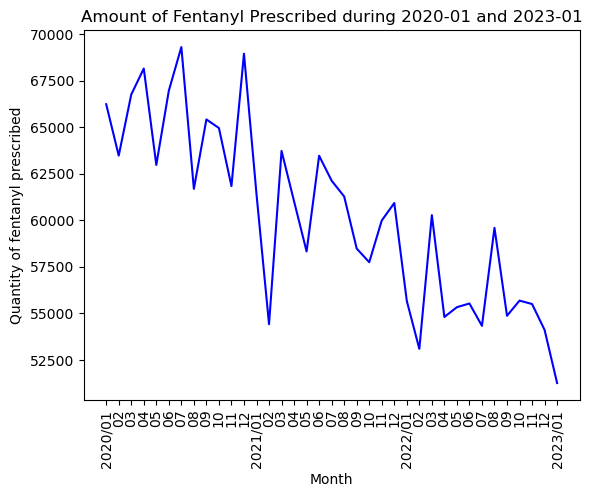

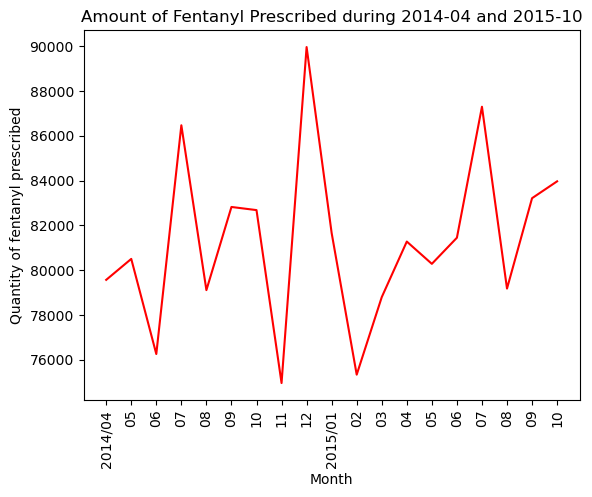

In [9]:
import matplotlib.pyplot as plt

# Plot time series plot for example A and B
# use the same method as in q1 to only include information about fentanyl
# use groupby and sum function to calculate the total quantity of prescription in each month
df_plot1 = ex1[ex1['CHEMICAL_SUBSTANCE_BNF_DESCR'].str.contains('[Ff]entanyl')].groupby(
    'YEAR_MONTH')['TOTAL_QUANTITY'].sum().reset_index()
df_plot2 = ex2[ex2['CHEMICAL_SUBSTANCE_BNF_DESCR'].str.contains('[Ff]entanyl')].groupby(
    'YEAR_MONTH')['TOTAL_QUANTITY'].sum().reset_index()

# Plot the time series for example A
plt.plot(df_plot1.index, df_plot1.TOTAL_QUANTITY, color='blue')
plt.title('Amount of Fentanyl Prescribed during 2020-01 and 2023-01')

# Customizing x-axis ticks
x_1 = ['2020/01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '2021/01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '2022/01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '2023/01']  # Replace with custom labels
plt.xticks(df_plot1.index, x_1, rotation=90)

plt.xlabel('Month')
plt.ylabel('Quantity of fentanyl prescribed')
plt.show()

# Plot the time series for example B
plt.plot(df_plot2.index, df_plot2.TOTAL_QUANTITY,color='red')
plt.title('Amount of Fentanyl Prescribed during 2014-04 and 2015-10')

# Customizing x-axis ticks
x_2 = ['2014/04', '05', '06', '07', '08', '09', '10', '11', '12',
       '2015/01', '02', '03', '04', '05', '06', '07', '08', '09', '10']  # Replace with custom labels
plt.xticks(df_plot2.index, x_2, rotation=90)

plt.xlabel('Month')
plt.ylabel('Quantity of fentanyl prescribed')
plt.show()

## Q3 - Validate the following claims:
A. There was a drop in the total quantity of opioid analgesics prescribed in London from 2016 to 2018 to relieve Central Nervous System (BNF 4.7.2) related pain (refer to https://openprescribing.net/bnf/ for a list of BNF codes).

B. More fentanyl was prescribed as an analgesic for Central Nervous System conditions as part of BNF chapter 4, in London in February 2016 than in October 2016.

## A3:
Claim A is true, claim B is false.

In the evaluation of Claim A, utilizing Open Prescribing data, the BNF codes corresponding to opioid analgesics were found to commence with '0407020'. Post data filtration, the mean function was employed to ascertain the average monthly prescription volume of opioid analgesics in London for the years 2016, 2017, and 2018. The calculated average monthly prescription counts were as follows: 11,271,968 in 2016, approximately 11,107,142 in 2017, and around 10,775,138 in 2018. To elucidate these findings, a time series plot was constructed. This plot featured a trend line which clearly depicted a downward trajectory in the total volume of opioid analgesic prescriptions from 2016 through 2018.

Regarding Claim B, the analysis of fentanyl prescriptions in London reveals that in February 2016, the absolute number of prescriptions was 80,108, increasing slightly to 81,587 by October of the same year. This represents a marginal decrease of 1,479 prescriptions in February compared to October 2016. However, when examining the data in terms of proportions, the percentage of fentanyl prescriptions in February 2016 (0.125%) was marginally higher than in October 2016 (0.124%), though in this case, it may have no practical significance.

In [10]:
# Solution for claim A
# use load_epd function I created above to load the data from 2016 to 2018
epd_16_18 = load_epd(start_time = 201601, end_time = 201812)

# use BNF code to filter
opioid_16_18 = epd_16_18[epd_16_18['BNF_CODE'].str.startswith('0407020')]

# create a table of total quantity of opioid analgesics prescribed in London from 2016 to 2018
t1 = opioid_16_18.groupby('YEAR_MONTH')['TOTAL_QUANTITY'].sum().reset_index()
print(t1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4790122 entries, 0 to 1541594
Data columns (total 15 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   YEAR_MONTH                    int64  
 1   PRACTICE_NAME                 object 
 2   PRACTICE_CODE                 object 
 3   BNF_CHEMICAL_SUBSTANCE        object 
 4   CHEMICAL_SUBSTANCE_BNF_DESCR  object 
 5   BNF_CODE                      object 
 6   BNF_DESCRIPTION               object 
 7   BNF_CHAPTER_PLUS_CODE         object 
 8   QUANTITY                      float64
 9   ITEMS                         int64  
 10  TOTAL_QUANTITY                float64
 11  ADQUSAGE                      float64
 12  NIC                           float64
 13  ACTUAL_COST                   float64
 14  UNIDENTIFIED                  object 
dtypes: float64(5), int64(2), object(8)
memory usage: 584.7+ MB
Summary of Loaded Data:
None
    YEAR_MONTH  TOTAL_QUANTITY
0       201601     10799701.00
1

In [11]:
# average number of opioid prescriptions per month in 2016
print(t1[t1.YEAR_MONTH <= 201612].TOTAL_QUANTITY.mean())

# average number of opioid prescriptions per month in 2017
print(t1[(t1.YEAR_MONTH <= 201712) & (t1.YEAR_MONTH >= 201701)].TOTAL_QUANTITY.mean())

# average number of opioid prescriptions per month in 2018
print(t1[(t1.YEAR_MONTH <= 201812) & (t1.YEAR_MONTH >= 201801)].TOTAL_QUANTITY.mean())

11271968.198333332
11107141.905000001
10775138.083333334


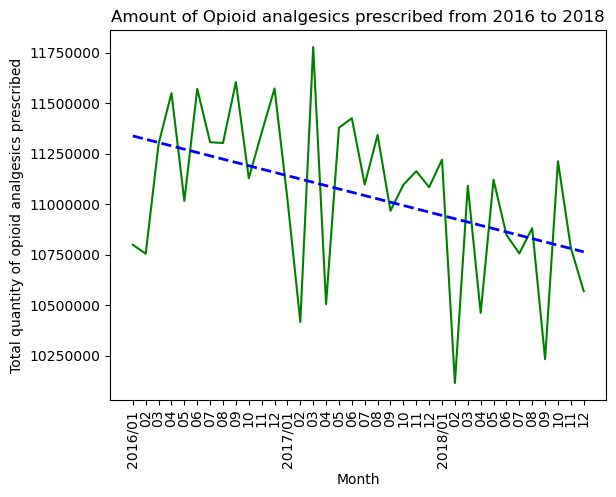

In [12]:
import numpy as np

# use line plot to visualize the data
plt.plot(t1.index, t1.TOTAL_QUANTITY, color='green')
plt.title('Amount of Opioid analgesics prescribed from 2016 to 2018')

# Customizing x-axis ticks
t1_tick = ['2016/01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
           '2017/01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
           '2018/01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']  # Replace with custom labels
plt.xticks(t1.index, t1_tick, rotation=90)

# avoid scientific form with exponential notation in y axis
plt.ticklabel_format(useOffset=False, style='plain', axis='y')

# Create a trendline
slope, intercept = np.polyfit(t1.index, t1.TOTAL_QUANTITY, 1)
line = slope * t1.index + intercept
plt.plot(t1.index, line, linestyle='--', color='blue', linewidth=2)

plt.xlabel('Month')
plt.ylabel('Total quantity of opioid analgesics prescribed')
plt.show()

In [13]:
# Solution for claim B
# the number of prescription of all drugs in BNF section 4 in Feb 2016 
bnf_4_1602 = epd_16_18[(epd_16_18['YEAR_MONTH'] == 201602) & epd_16_18['BNF_CODE'].str.startswith('04')]

# the number of prescription of all drugs in BNF section 4 in Oct 2016 
bnf_4_1610 = epd_16_18[(epd_16_18['YEAR_MONTH'] == 201610) & epd_16_18['BNF_CODE'].str.startswith('04')]

# the number of prescription of fentanyl in Feb 2016 
fen_1602 = bnf_4_1602[bnf_4_1602['CHEMICAL_SUBSTANCE_BNF_DESCR'].str.contains('[Ff]entanyl')]

# the number of prescription of fentanyl in Oct 2016 
fen_1610 = bnf_4_1610[bnf_4_1610['CHEMICAL_SUBSTANCE_BNF_DESCR'].str.contains('[Ff]entanyl')]

In [14]:
# use sum function to calculate the absolute number
print('The number of prescription of fentanyl in Feb 2016 in London:',fen_1602['TOTAL_QUANTITY'].sum())
print('The number of prescription of fentanyl in Oct 2016 in London:',fen_1610['TOTAL_QUANTITY'].sum())

# calculate the percentages
print('The proportion of prescription of fentanyl in Feb 2016 in London:',
      fen_1602['TOTAL_QUANTITY'].sum() / bnf_4_1602['TOTAL_QUANTITY'].sum())
print('The proportion of prescription of fentanyl in Oct 2016 in London:',
      fen_1610['TOTAL_QUANTITY'].sum() / bnf_4_1610['TOTAL_QUANTITY'].sum())

The number of prescription of fentanyl in Feb 2016 in London: 80108.0
The number of prescription of fentanyl in Oct 2016 in London: 81587.0
The proportion of prescription of fentanyl in Feb 2016 in London: 0.0012540752082497019
The proportion of prescription of fentanyl in Oct 2016 in London: 0.0012371965559433396


## Q4 – develop regular expressions to parse BNF descriptions:
Focusing only on the prescription data from 2022 and BNF chapter 4, develop regular expressions to (A) extract the type of delivery each prescription has, i.e., tablets, patches... etc. (B) the amount of the active ingredient in the product. Generate a table showing the type, amount, item count and percentage of all items that were prescribed.

## A4:
Utilizing the `load_epd` function developed earlier, I successfully loaded the dataset for the year 2022. An initial examination of the dataset was conducted using the head function, which revealed that details regarding the type of delivery and the quantity of active ingredients were embedded within the `BNF_DESCRIPTION` column. To further analyze this, I employed the `unique` function to obtain an array of distinct BNF descriptions. A meticulous review of these descriptions identified prevalent delivery forms such as "tablets" and "capsules." Consequently, I compiled a list encompassing these identified delivery types from the BNF descriptions.

Subsequently, I applied a custom-built function incorporating `re.search` and `findall` function for efficient data extraction. However, this process resulted in some instances labeled as "No delivery type found." To address this, I conducted a manual review of the array and subsequently refined the list to encompass a comprehensive range of delivery types.

Finally, I utilized the pandas library to manually construct a table, incorporating a column named `item_count`. This column was generated through the application of `groupby` and `sum` functions on the `ITEMS` field, enabling a detailed aggregation and analysis of the data.

During my initial attempt to extract the delivery type from the dataset, I hypothesized that a straightforward, universal regex pattern might suffice. Such a pattern, for instance, could assume that the delivery type is either the final word in the BNF description or is positioned immediately following the quantity of active ingredients. However, a thorough examination of the dataset array revealed the impracticality of this approach. 

In the process of developing the comprehensive `delivery_types` list, I encountered a notable variety of abbreviations within the dataset, such as "susp" for "suspension" and "tab" for "tablets". This observation underscored the complexity and diversity of the terminology used in the BNF descriptions. Furthermore, I identified instances where a single BNF description encompassed multiple delivery types, adding another layer of complexity to the data extraction process. These findings highlighted the need for a more nuanced and adaptable approach to accurately categorize and interpret the range of delivery types present in the dataset. And There is an urgent need to standardize the naming conventions about BNF description.

In [33]:
# load the data using the function created above
epd_22 = load_epd(start_time=202201, end_time=202212)
bnf_04_22 = epd_22[epd_22['BNF_CODE'].str.startswith('04')]

# explore the dataframe
print(bnf_04_22.head())

# find the types of delivery to form a list
list_bnf_des = bnf_04_22.BNF_DESCRIPTION.unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1440585 entries, 0 to 1440584
Data columns (total 15 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   YEAR_MONTH                    1440585 non-null  int64  
 1   PRACTICE_NAME                 1440585 non-null  object 
 2   PRACTICE_CODE                 1440585 non-null  object 
 3   BNF_CHEMICAL_SUBSTANCE        1440585 non-null  object 
 4   CHEMICAL_SUBSTANCE_BNF_DESCR  1440585 non-null  object 
 5   BNF_CODE                      1440585 non-null  object 
 6   BNF_DESCRIPTION               1440585 non-null  object 
 7   BNF_CHAPTER_PLUS_CODE         1440585 non-null  object 
 8   QUANTITY                      1440585 non-null  float64
 9   ITEMS                         1440585 non-null  int64  
 10  TOTAL_QUANTITY                1440585 non-null  float64
 11  ADQUSAGE                      1440585 non-null  float64
 12  NIC                         

In [16]:
# the type of delivery is embeded in the column 'BNF_DESCRIPTION'
# List of various delivery types
delivery_types = ["tablets", "capsules", "patches", "solution", "applicator", "suspension", "sachets",
                  "spray", "caplets", "suppositories", "inj", "liquid", "films", "gel","lyophilisates",
                  "lozenges", "sticks", "tab","mixture", "drops", "susp"]

# Build a function to extract the type of delivery
def extract_type(text):
    return ', '.join(dt for dt in delivery_types if re.search(r'\b' + re.escape(dt) + r'\b',
                                                              text, re.IGNORECASE)) or 'No delivery type found'

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
bnf_04_22_copy = bnf_04_22.copy()

# use regx to extract the type of delivery of each prescription and create a new column called 'type of delivery'
bnf_04_22_copy['type_of_delivery'] = bnf_04_22_copy['BNF_DESCRIPTION'].apply(extract_type)

# use regx to extract the amount of the active ingredient in each prescription and create a new column called 'amount'
bnf_04_22_copy['amount'] = bnf_04_22_copy['BNF_DESCRIPTION'].apply(lambda x: ' '.join(re.findall(r'\b\d+\w+\b', x)))

In [18]:
# generate a table using groupby function to include the type, amount and item count
my_table = bnf_04_22_copy.groupby(['type_of_delivery','amount'])['ITEMS'].sum().reset_index()

# create a column called 'percentage' to include the percentage of all items 
my_table['percentage'] = my_table['ITEMS']/my_table['ITEMS'].sum() * 100

# rename the column "ITEMS" to "item count"
my_table.rename(columns={'ITEMS': 'item_count'}, inplace=True)

# explore the table created
my_table.head()

,type_of_delivery,amount,item_count,percentage
0,applicator,200microgram,44,0.000835
1,applicator,400microgram,109,0.002068
2,applicator,600microgram,9,0.000171
3,applicator,800microgram,9,0.000171
4,"applicator, lozenges",6mg,8,0.000152


## Q5 - explore regional differences:
A more in-depth analysis of the health board at Camden practices' prescribing of Paracetamol 500mg soluble tablets compared to the rest of the Clinical Commissioning Groups(CCGs) which now form the North Central London Integrated Care Board (NCL ICB). 

For the first quarter of 2023, produce a summary table where each column contains information for one of the five CCGs, and the table contains summary information about the total number of patients registered, the total quantity of Paracetamol 500mg soluble tablets prescribed, and the total quantity per 1000 patients.

Note: In April 2020, Barnet, Camden, Enfield, Haringey and Islington CCGs merged to form the North Central London Integrated Care Board.


## A5:
I employed the `load_epd` function for the initial reading of the data files. To refine the dataset, the `str.contains` function was utilized for effective filtering. Subsequently, I harnessed the `pd.read_csv` method to load files containing data on the number of registered patients. The next step involved generating a list of medical practices associated with the five Clinical Commissioning Groups (CCGs). This was achieved through the application of the `unique` and `tolist` functions on the `PRACTICE_CODE`. Finally, a for loop was constructed to systematically produce a table containing the requisite information. This methodical approach ensured a structured and efficient analysis of the data pertinent to the study.

Upon examining the data, it was observed that in the first quarter of 2023, Barnet CCG had the highest number of registered patients, while Islington CCG had the lowest. The range of the total number of patients registered is 455,047, the average number is 1,066,909 and the standard deviation is 166,313. 

In terms of medication prescribing patterns, Barnet CCG recorded the highest number of prescriptions for Paracetamol 500mg soluble tablets during this period, with a total of 86,517. This figure notably exceeded that of Haringey CCG by 34,324 prescriptions. The average number of prescription is 65,711. The std is 14,557. Nonetheless, Islington CCG exhibits the highest total prescription volume per 1,000 patients, surpassing Camden CCG by 32 units. The average quantity of prescription per 1000 patients is 62. This suggests a unique pattern of prescribing or a distinct patient requirement within Islington CCG. 

In [19]:
# load epd data from 2023 q1 using function created above
# filter the data using str.contains
epd_23_q1 = load_epd(start_time = 202301, end_time = 202303)
par_23 = epd_23_q1[epd_23_q1['BNF_DESCRIPTION'].str.contains('Paracetamol 500mg soluble tablets')]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357062 entries, 0 to 357061
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   YEAR_MONTH                    357062 non-null  int64  
 1   PRACTICE_NAME                 357062 non-null  object 
 2   PRACTICE_CODE                 357062 non-null  object 
 3   BNF_CHEMICAL_SUBSTANCE        357062 non-null  object 
 4   CHEMICAL_SUBSTANCE_BNF_DESCR  357062 non-null  object 
 5   BNF_CODE                      357062 non-null  object 
 6   BNF_DESCRIPTION               357062 non-null  object 
 7   BNF_CHAPTER_PLUS_CODE         357062 non-null  object 
 8   QUANTITY                      357062 non-null  float64
 9   ITEMS                         357062 non-null  int64  
 10  TOTAL_QUANTITY                357062 non-null  float64
 11  ADQUSAGE                      357062 non-null  float64
 12  NIC                           357062 non-nul

In [20]:
# load the epd_location_lookup.csv to look up the name of practice in the assigned Clinical Commissioning Groups(CCGs)
cgg = pd.read_csv('Coursework_data/epd_location_lookup.csv')

# load the registered patients data from the first quarter of 2023
reg01 = pd.read_csv('Coursework_data/gp-reg-pat-prac-all-202301.csv')
reg02 = pd.read_csv('Coursework_data/gp-reg-pat-prac-all-202302.csv')
reg03 = pd.read_csv('Coursework_data/gp-reg-pat-prac-all-202303.csv')

# merge the three dataframe that has info of number of registration into one 
merged_reg = pd.concat([reg01, reg02, reg03], ignore_index=True)

# put all the practice codes from each designated CCG into a list using unique and tolist function
# to just include the distinct code
cam_code = cgg[cgg.PCO_NAME =='CAMDEN CCG']['PRACTICE_CODE'].unique().tolist()
bar_code = cgg[cgg.PCO_NAME =='BARNET CCG']['PRACTICE_CODE'].unique().tolist()
enf_code = cgg[cgg.PCO_NAME =='ENFIELD CCG']['PRACTICE_CODE'].unique().tolist()
har_code = cgg[cgg.PCO_NAME =='HARINGEY CCG']['PRACTICE_CODE'].unique().tolist()
isl_code = cgg[cgg.PCO_NAME =='ISLINGTON CCG']['PRACTICE_CODE'].unique().tolist()

# use for loop to calculate and print the total quantity of prescription for five CCGs
# and the total number of patients registered in each CCG
# first create an empty DataFrame
df = pd.DataFrame()

# through each iteration, it generates outputs of one CCG
for i in [cam_code, bar_code, enf_code, har_code, isl_code]:
    
    # use sum function to calculate the amount of prescription
    total_quantity = par_23[par_23['PRACTICE_CODE'].isin(i)][ 'TOTAL_QUANTITY'].sum()
    num_patients = merged_reg[merged_reg['CODE'].isin(i)]['NUMBER_OF_PATIENTS'].sum()
    total_per_1000 = total_quantity/num_patients * 1000
    cgg_name = cgg[cgg['PRACTICE_CODE'].isin(i)].reset_index().loc[1,'PCO_NAME']
    
    df[cgg_name]={'total number of patients registered':num_patients, 
                  'total quantity of prescription':total_quantity, 
                  'total_quantity_per_1000':total_per_1000}
    
    print(f"For {cgg_name}, total quantity of Paracetamol 500mg soluble tablets prescribed is {total_quantity}",
          f",total number of patients registered in first quarter of 2023 is {num_patients}.")
    

For CAMDEN CCG, total quantity of Paracetamol 500mg soluble tablets prescribed is 52230.0 ,total number of patients registered in first quarter of 2023 is 1030441.
For BARNET CCG, total quantity of Paracetamol 500mg soluble tablets prescribed is 86517.0 ,total number of patients registered in first quarter of 2023 is 1332162.
For ENFIELD CCG, total quantity of Paracetamol 500mg soluble tablets prescribed is 64868.0 ,total number of patients registered in first quarter of 2023 is 1080357.
For HARINGEY CCG, total quantity of Paracetamol 500mg soluble tablets prescribed is 52193.0 ,total number of patients registered in first quarter of 2023 is 1014472.
For ISLINGTON CCG, total quantity of Paracetamol 500mg soluble tablets prescribed is 72751.0 ,total number of patients registered in first quarter of 2023 is 877115.


In [21]:
# print the table for five CCGs
# use function to avoid the scientific notation
df = df.astype(int)
df

,CAMDEN CCG,BARNET CCG,ENFIELD CCG,HARINGEY CCG,ISLINGTON CCG
total number of patients registered,1030441,1332162,1080357,1014472,877115
total quantity of prescription,52230,86517,64868,52193,72751
total_quantity_per_1000,50,64,60,51,82


In [22]:
# descriptive statistics of five CCGs
# first transpose the dataframe
df_trans = df.transpose()
df_trans.describe().astype(int)

,total number of patients registered,total quantity of prescription,total_quantity_per_1000
count,5,5,5
mean,1066909,65711,61
std,166313,14557,12
min,877115,52193,50
25%,1014472,52230,51
50%,1030441,64868,60
75%,1080357,72751,64
max,1332162,86517,82


## Q6 – OOP question:
## A6:
I initialized the classes with data from January 2023, utilizing the load_epd function to import the dataset.

Within the Drug class, I used a for loop and PracticePrescribingRecord class to build a list of practice prescribing records for the drug.
Within the ChemicalSubstance class, I used a for loop and Drug class to build a list of drugs which have this substance as their active 
ingredient.

As for the Formulary class, firstly I constructed a dictionary based on these BNF sections as outlined in OpenPrescribing to facilitate data categorization and retrieval. Within the BNF code repository, specific codes are designated for various drug categories: "010606" corresponds to "Peripheral opioid-receptor antagonists," "040701" is for "Non-opioid analgesics and compound preparations," "040702" denotes "Opioid analgesics," "041003" indicates "Opioid dependence," and "150104" relates to "Sedative and analgesic peri-operative drugs.". 

In [23]:
# Import the dataset
epd_2301 = load_epd(start_time = 202301, end_time = 202301)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119972 entries, 0 to 119971
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   YEAR_MONTH                    119972 non-null  int64  
 1   PRACTICE_NAME                 119972 non-null  object 
 2   PRACTICE_CODE                 119972 non-null  object 
 3   BNF_CHEMICAL_SUBSTANCE        119972 non-null  object 
 4   CHEMICAL_SUBSTANCE_BNF_DESCR  119972 non-null  object 
 5   BNF_CODE                      119972 non-null  object 
 6   BNF_DESCRIPTION               119972 non-null  object 
 7   BNF_CHAPTER_PLUS_CODE         119972 non-null  object 
 8   QUANTITY                      119972 non-null  float64
 9   ITEMS                         119972 non-null  int64  
 10  TOTAL_QUANTITY                119972 non-null  float64
 11  ADQUSAGE                      119972 non-null  float64
 12  NIC                           119972 non-nul

In [24]:
class PracticePrescribingRecord:
    
    """A class representing a practice prescribing record, equivalent to a row in EPD data."""
    def __init__(self, practice_name, practice_code, total_quantity, actual_cost):
        self.practice_name = practice_name
        self.practice_code = practice_code
        self.total_quantity = total_quantity
        self.actual_cost = actual_cost
        
        # store the sepecific row of epd data into df
        self.df = epd_2301[(epd_2301['PRACTICE_CODE']==practice_code) & (epd_2301['ACTUAL_COST']==actual_cost)]

In [25]:
# instantiate the PracticePrescribingRecord class using epd_2301
record1 = PracticePrescribingRecord(epd_2301.loc[3,'PRACTICE_NAME'],epd_2301.loc[3,'PRACTICE_CODE'],
                                    epd_2301.loc[3,'TOTAL_QUANTITY'],epd_2301.loc[3,'ACTUAL_COST'])
record1.df

,YEAR_MONTH,PRACTICE_NAME,PRACTICE_CODE,BNF_CHEMICAL_SUBSTANCE,CHEMICAL_SUBSTANCE_BNF_DESCR,BNF_CODE,BNF_DESCRIPTION,BNF_CHAPTER_PLUS_CODE,QUANTITY,ITEMS,TOTAL_QUANTITY,ADQUSAGE,NIC,ACTUAL_COST,UNIDENTIFIED
3,202301,HANDSWORTH MEDICAL PRACTICE,F86004,0407010F0,Co-codamol (Codeine phosphate/paracetamol),0407010F0AAADAD,Co-codamol 30mg/500mg capsules,04: Central Nervous System,60.0,1,60.0,10.0,2.54,2.49216,N


In [26]:
class Drug:
    
    """A class representing a drug, including its BNF code, description, and associated practice prescribing records."""
    def __init__(self, drug_name):
        self.drug_name = drug_name
        
        # match the drug code using epd_2301 to the given drug name
        self.drug_code = epd_2301[epd_2301['BNF_DESCRIPTION'] == drug_name].reset_index().loc[0,'BNF_CODE']
        
        self.recordslist = pd.DataFrame()
        
        """Utilise a for loop to add a practice prescribing record to the drug."""
        for i in epd_2301.index:
            if epd_2301.loc[i,'BNF_DESCRIPTION'] == drug_name:
                
                # use the class I built above to filter the prescribing record
                # and use concat function to make a list
                record = PracticePrescribingRecord(epd_2301.loc[i,'PRACTICE_NAME'],epd_2301.loc[i,'PRACTICE_CODE'],
                                                   epd_2301.loc[i,'TOTAL_QUANTITY'],epd_2301.loc[i,'ACTUAL_COST'])
                self.recordslist = pd.concat([self.recordslist, record.df])
            else:
                pass
        
        # reset the index
        self.recordslist = self.recordslist.reset_index(drop=True)
        
        # calculate the total cost of the specific drug
        self.total_cost = self.recordslist['ACTUAL_COST'].sum()

In [34]:
# instantiate the Drug class using Aspirin 300mg gastro-resistant tablets
drug1 = Drug('Aspirin 300mg gastro-resistant tablets')
print(drug1.recordslist.head())
print(f"Total cost of Aspirin 300mg gastro-resistant tablets:£{drug1.total_cost}")

   YEAR_MONTH                PRACTICE_NAME PRACTICE_CODE  \
0      202301  HANDSWORTH MEDICAL PRACTICE        F86004   
1      202301           MANOR ROAD SURGERY        G84008   
2      202301        NEWTON MEDICAL CENTRE        E87681   
3      202301    GROVELANDS MEDICAL CENTRE        F85072   
4      202301     BRENTFORD GROUP PRACTICE        E85605   

  BNF_CHEMICAL_SUBSTANCE CHEMICAL_SUBSTANCE_BNF_DESCR         BNF_CODE  \
0              0407010B0                      Aspirin  0407010B0AAA3A3   
1              0407010B0                      Aspirin  0407010B0AAA3A3   
2              0407010B0                      Aspirin  0407010B0AAA3A3   
3              0407010B0                      Aspirin  0407010B0AAA3A3   
4              0407010B0                      Aspirin  0407010B0AAA3A3   

                          BNF_DESCRIPTION       BNF_CHAPTER_PLUS_CODE  \
0  Aspirin 300mg gastro-resistant tablets  04: Central Nervous System   
1  Aspirin 300mg gastro-resistant tablets  04: C

In [29]:
class ChemicalSubstance:

    """A class representing a chemical substance, including its name, code, and associated drugs."""
    def __init__(self, substance_name, substance_code):
        self.substance_name = substance_name
        self.substance_code = substance_code
        self.druglist = list(set(epd_2301[epd_2301['BNF_CHEMICAL_SUBSTANCE']==self.substance_code]['BNF_DESCRIPTION'].tolist()))
        self.total_cost = 0
        for i in self.druglist:
            drug = Drug(i)
            self.total_cost += drug.total_cost

In [30]:
# instantiate the ChemicalSubstance class using epd_2301 data
# output the taotal_cost
co_codamol = ChemicalSubstance(epd_2301.loc[1,'CHEMICAL_SUBSTANCE_BNF_DESCR'],epd_2301.loc[1,'BNF_CHEMICAL_SUBSTANCE'])
co_codamol.total_cost

1773.41348

In [31]:
# generate a formulary_name list 
formulary_list = {"Peripheral opioid-receptor antagonists":"010606", "Non-opioid analgesics and compound preparations":"040701",
                  "Opioid analgesics":"040702", "Opioid dependence":"041003", "Sedative and analgesic peri-operative drugs":"150104"}

class Formulary:
    """A class representing the overall system, including a formulary name and a list of substances."""

    def __init__(self, formulary_name):
        self.formulary_name = formulary_name
        # Creating a unique list of chemical substance descriptions
        self.substancelist = list(set(epd_2301[epd_2301['BNF_CHEMICAL_SUBSTANCE'].str.startswith(formulary_list[formulary_name])]['CHEMICAL_SUBSTANCE_BNF_DESCR'].tolist()))
        
        self.total_cost = 0
        # Iterating through the list to create ChemicalSubstance instances and calculate total cost
        for substance_name in self.substancelist:
            substance_code = epd_2301[epd_2301['CHEMICAL_SUBSTANCE_BNF_DESCR'] == substance_name].iloc[0]['BNF_CHEMICAL_SUBSTANCE']
            chemical = ChemicalSubstance(substance_name, substance_code)
            self.total_cost += chemical.total_cost

    def __str__(self):
        return f"The {self.formulary_name} formulary contains {len(self.substancelist)} substances and a total cost of £{self.total_cost:.2f}"

In [32]:
# instantiate the Formulary class
# and print the results
formulary1 = Formulary("Peripheral opioid-receptor antagonists")
print(formulary1)

The Peripheral opioid-receptor antagonists formulary contains 3 substances and a total cost of £11747.54
